# Mestrado 2023 - Implementações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [2]:
# Import data
data = pd.read_csv("../Datasets/rosario_hosp.csv") 
city_name = 'Rosario' 
indicator='hospitalizations'

In [3]:
data.columns

Index(['Unnamed: 0', 'cidade', 'date', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients'],
      dtype='object')

In [4]:
# Get cummulative indicator from daily data
daily_data = data.new_hospitalized_patients.tolist()
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

# 12th day (15/03/2020)
acc_data = np.array(acc_data[12:])

# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

scaling_factor = 1000*len(acc_data)
#scaling_factor = max(acc_data)
acc_data = acc_data / scaling_factor
daily_data = list(data.new_hospitalized_patients/ scaling_factor)

In [5]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

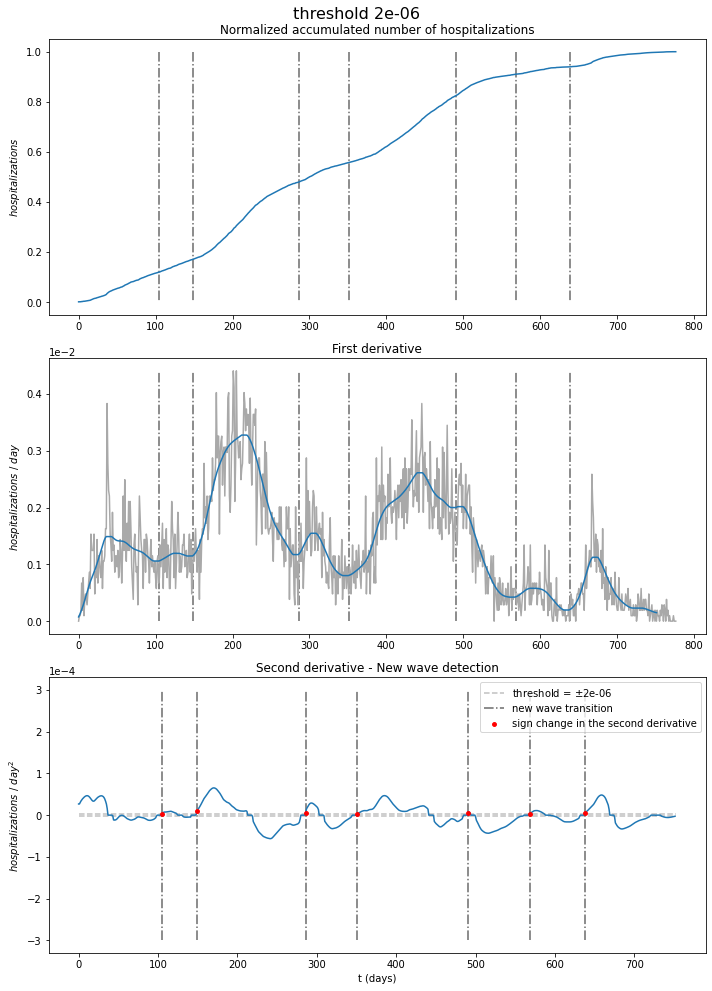

x_nw: [149, 286, 351, 491, 568]


In [6]:
# Transition Points
x_nw = get_transition_points(acc_data, visual=True, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

### Ajuste do modelo utilizando MSE

Sigmoid #1 - A0:0.021056770949504137 | tp0:90.000003858826 | delta0:33.750000480369266 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.021056770949504137 | tp0:90.000003858826 | delta0:33.750000480369266 | nu0:1.0 
Sigmoid #2 - A0:0.009787535056962664 | tp0:90.00000532833388 | delta0:33.75000156747373 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.009787535056962664 | tp0:90.00000532833388 | delta0:33.75000156747373 | nu0:1.0 
Sigmoid #3 - A0:0.006727019945533978 | tp0:90.00000583468778 | delta0:33.75000191889066 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.006727019945533978 | tp0:90.00000583468778 | delta0:33.75000191889066 | nu0:1.0 
Sigmoid #4 - A0:0.012349812921762491 | tp0:90.00000675734631 | delta0:33.75000265078649 | nu0:1.0 
(optimal) Sigmoid #4 - A0:0.012349812921762491 | tp0:90.00000675734631 | delta0:33.75000265078649 | nu0:1.0 
Sigmoid #5 - A0:0.0072222403990862 | tp0:90.0000077845474 | delta0:33.75000353560057 | nu0:1.0 


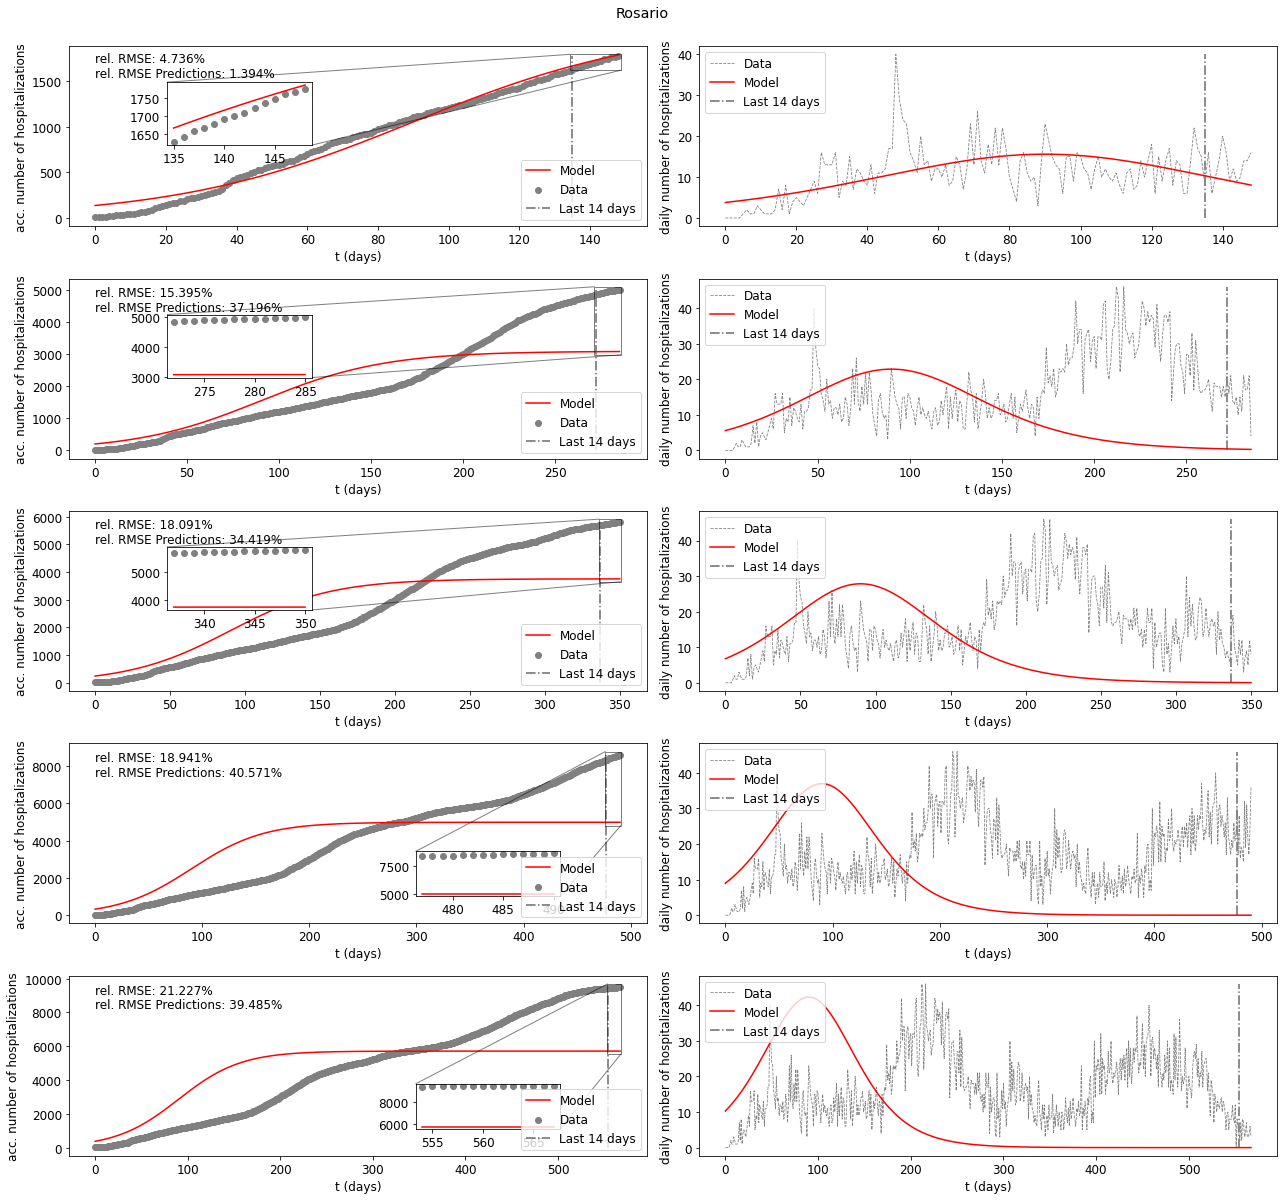

In [7]:
sig_params = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'MSE'
                            )

### Ajuste do modelo utilizando ITSE

Sigmoid #1 - A0:0.020940938219151124 | tp0:90.00721599014693 | delta0:33.752965844253495 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.020940938219151124 | tp0:90.00721599014693 | delta0:33.752965844253495 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:0.02788071800415084 | tp0:212.88703312450022 | delta0:18.915977537671818 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.02788071800415084 | tp0:212.88703312450022 | delta0:18.915977537671818 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


Sigmoid #3 - A0:0.006273397629165921 | tp0:299.53977732082876 | delta0:0.001 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.006273397629165921 | tp0:299.53977732082876 | delta0:0.001 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


Sigmoid #4 - A0:0.011120589416555854 | tp0:299.53977732082876 | delta0:0.001 | nu0:1.0 
(optimal) Sigmoid #4 - A0:0.011120589416555854 | tp0:299.53977732082876 | delta0:0.001 | nu0:1.0 
Sigmoid #5 - A0:0.008837626264901024 | tp0:299.53977732082876 | delta0:0.001 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/Mestrado 2023/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


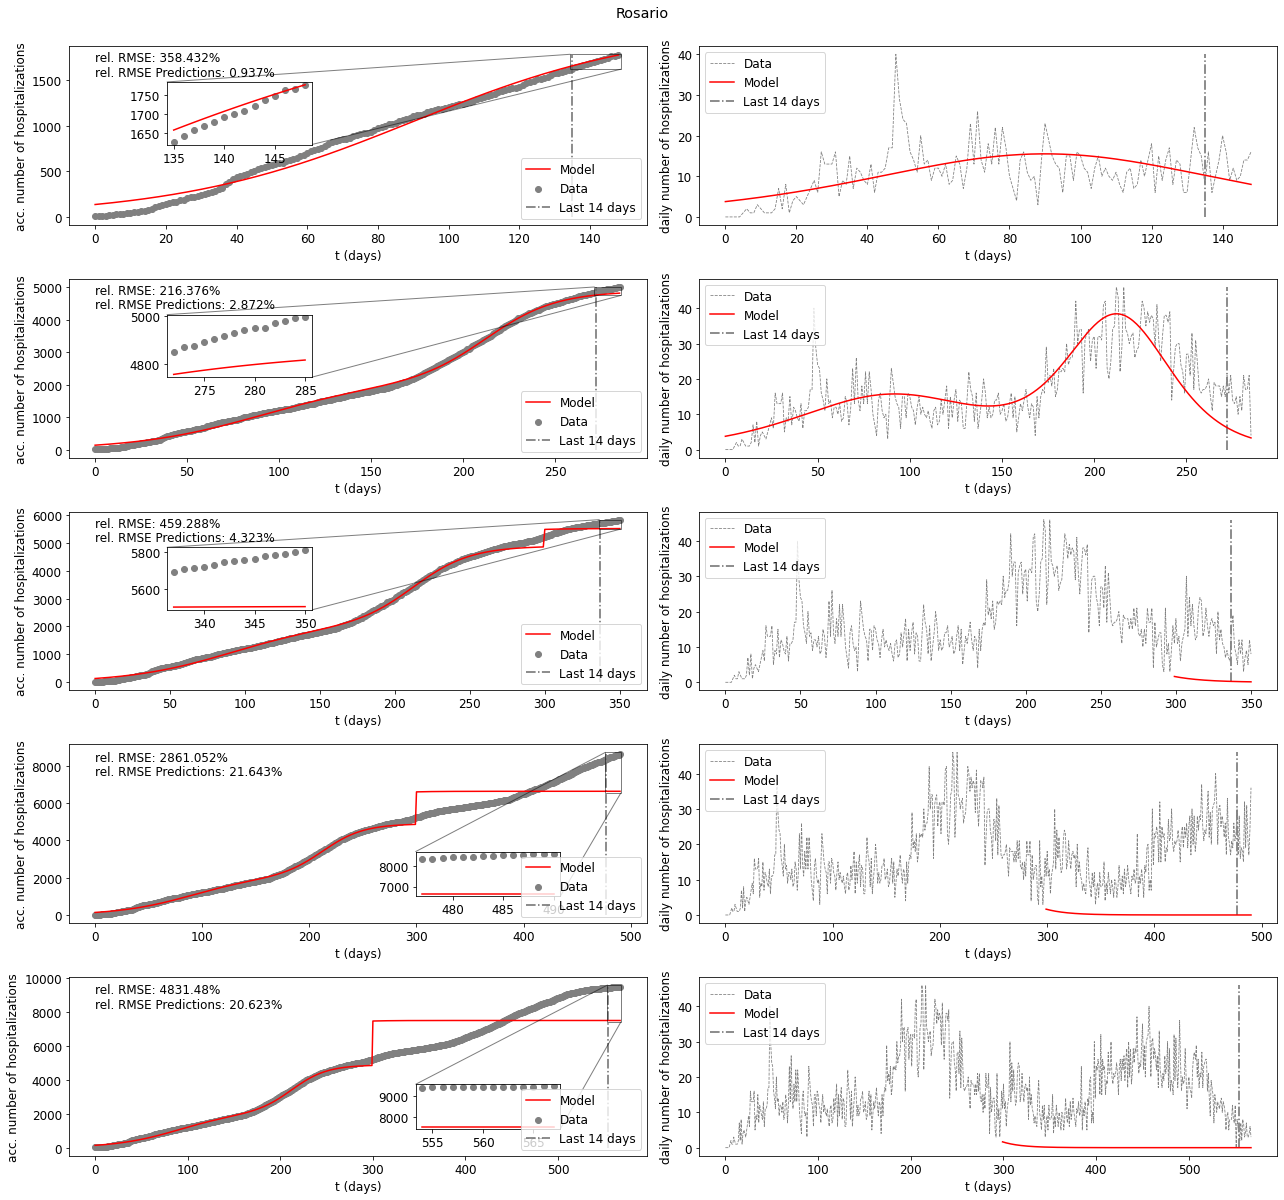

In [8]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'ITSE'
                            )

### Ajuste do modelo utilizando MTSE

Sigmoid #1 - A0:0.021056770949504137 | tp0:90.000003858826 | delta0:33.750000480369266 | nu0:1.0 
(optimal) Sigmoid #1 - A0:0.021056770949504137 | tp0:90.000003858826 | delta0:33.750000480369266 | nu0:1.0 
Sigmoid #2 - A0:0.009912685056766062 | tp0:90.00000531954908 | delta0:33.750001558972684 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.009912685056766062 | tp0:90.00000531954908 | delta0:33.750001558972684 | nu0:1.0 
Sigmoid #3 - A0:0.00383889745355001 | tp0:90.00000601004533 | delta0:33.750002065043425 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.00383889745355001 | tp0:90.00000601004533 | delta0:33.750002065043425 | nu0:1.0 
Sigmoid #4 - A0:0.00781298011535453 | tp0:90.00000658604264 | delta0:33.75000252366848 | nu0:1.0 
(optimal) Sigmoid #4 - A0:0.00781298011535453 | tp0:90.00000658604264 | delta0:33.75000252366848 | nu0:1.0 
Sigmoid #5 - A0:0.0 | tp0:90.00000716385918 | delta0:33.75000302907468 | nu0:1.0 


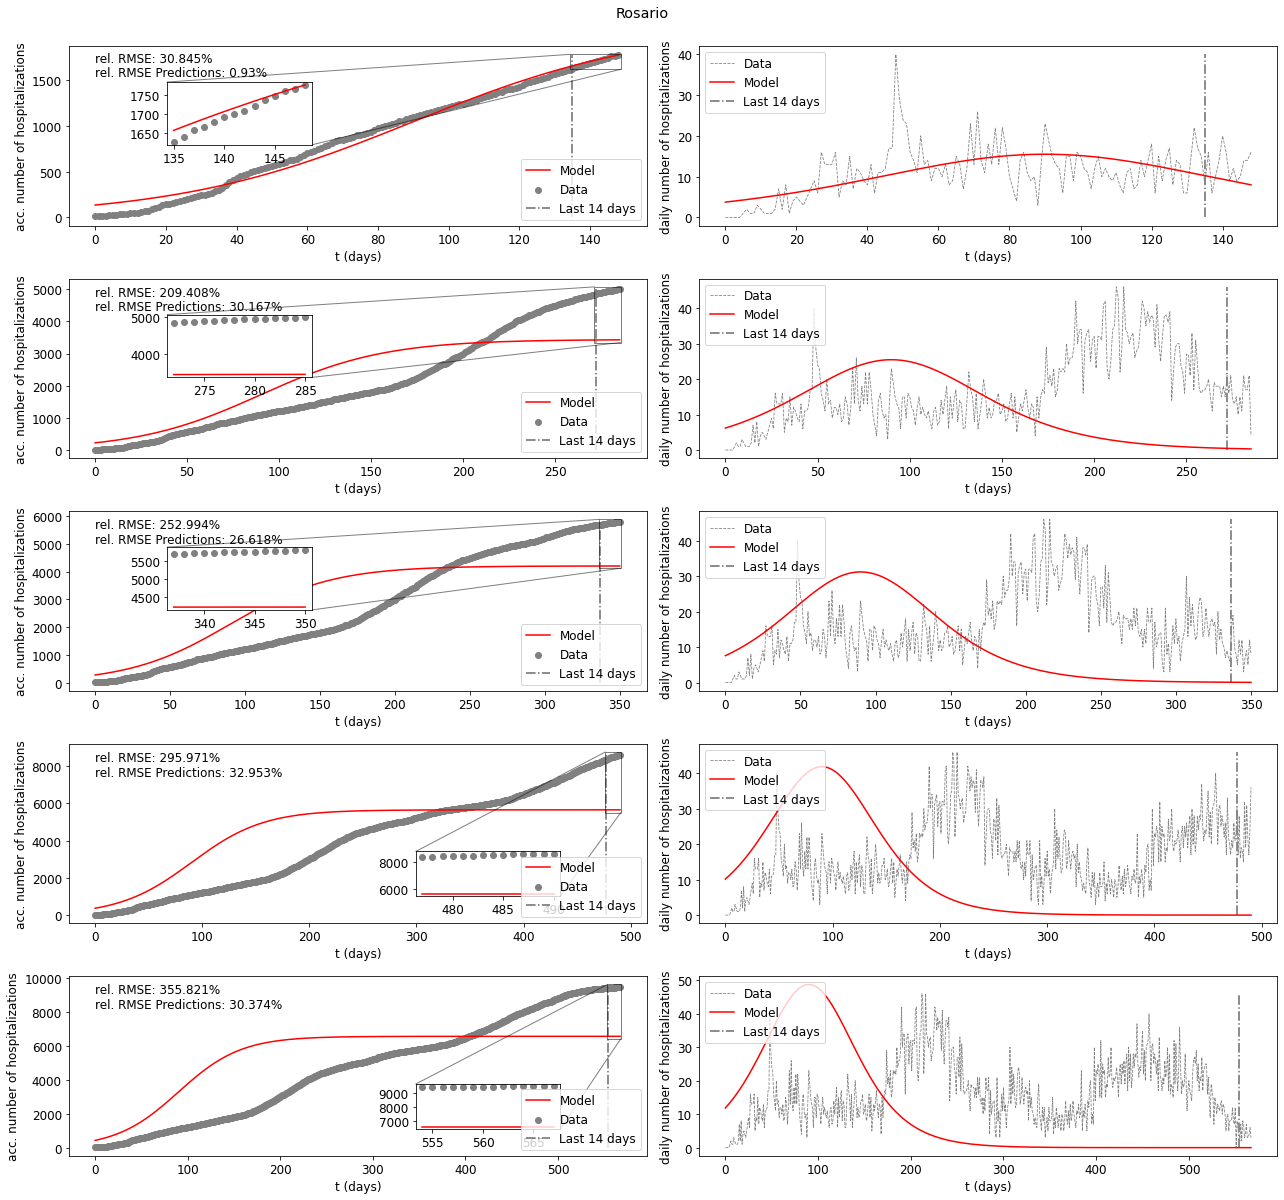

In [9]:
sig_params, rel_rmse_list, y_m = optimize.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 2,
                               scaling_factor = scaling_factor,
                               loss_function = 'MTSE'
                            )

### Explorando métricas de erro

In [10]:
def plotErrorFns(x, y, y_h):
    fig, axs = plt.subplots(2, 1, figsize=[15,15])

    axs[1].set_xlabel('t')
    axs[1].set_ylabel('f(t)')
    axs[0].plot(x, y, label='y')
    axs[0].plot(x, y_h, label='$\hat{y}$')
    axs[0].legend()
    # Error functions
    plt.figure(figsize=(15,6))
    AE = np.abs(y - y_h)
    SE = (y - y_h)**2
    APE = np.abs((y - y_h)/y)
    tSE = x*SE
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('E(t)')
    axs[1].plot(x, AE, label='AE: $|y-\hat{y}|$')
    axs[1].plot(x, SE, label='SE: ($y-\hat{y})^2$')
    axs[1].plot(x, APE, label='APE: $|\\frac{(y - \hat{y})}{y}|$')
    axs[1].plot(x, tSE, label='tSE: $t(y-\hat{y})^2$')
    axs[1].legend()
    print('SAE: ', np.sum(AE))
    print('SSE: ', np.sum(SE))
    print('SAPE: ', np.sum(APE))
    print('MAE: ', np.mean(AE))
    print('MSE: ', np.mean(SE))
    print('MAPE: ', np.mean(APE))
    print('RMSE: ', np.sqrt(np.mean(SE)))
    print('rel. RMSE: ', np.sqrt(np.mean(SE))/max(y))
    print('ITSE:', np.sum(tSE))
    print('MTSE (?):', np.mean(tSE))

SAE:  375.12250000000006
SSE:  687.9770832500001
SAPE:  134.26920258235572
MAE:  1.5004900000000003
MSE:  2.7519083330000003
MAPE:  0.5370768103294229
RMSE:  1.6588876794406546
rel. RMSE:  0.13619655663259356
ITSE: 1250.5835933125013
MTSE (?): 5.002334373250005


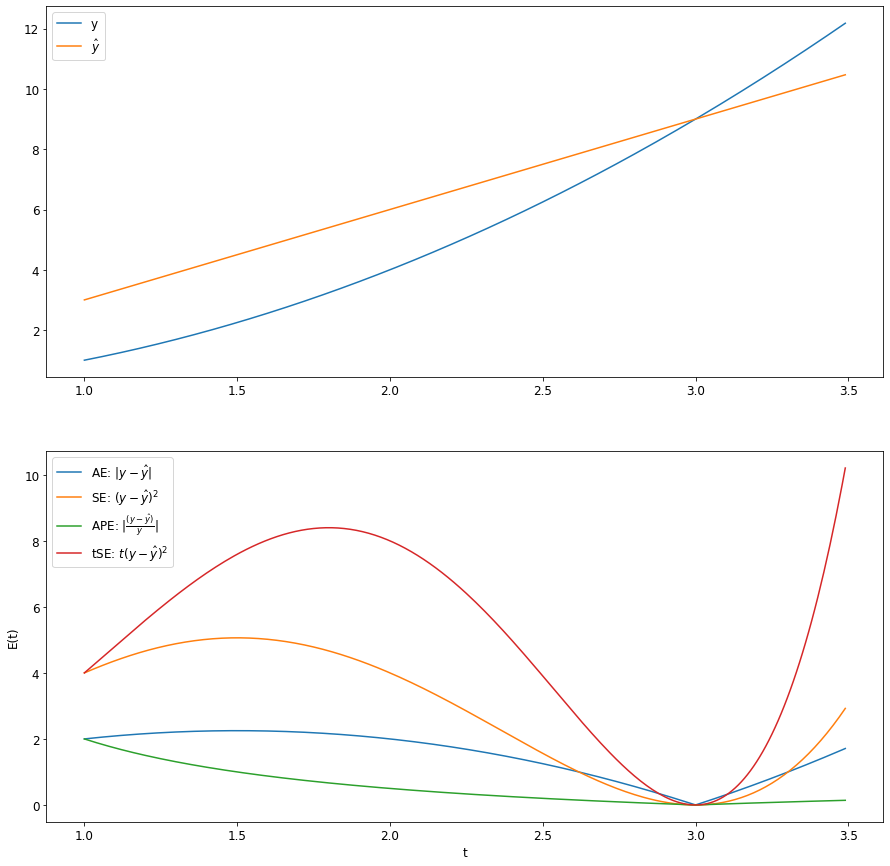

<Figure size 1080x432 with 0 Axes>

In [11]:
x = np.arange(1, 3.5, 0.01)
y = x**2
y_h = 3*x
plotErrorFns(x, y, y_h)

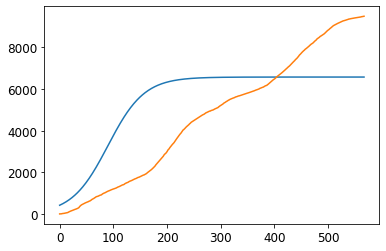

In [12]:
plt.plot(scaling_factor * y_m)
plt.plot(scaling_factor * acc_data[:x_nw[-1]]) # last elt

SAE:  12658.58014732046
SSE:  764458.459705044
SAPE:  49.58825255079031
MAE:  22.286232653733205
MSE:  1345.8775699032465
MAPE:  0.08730326153308153
RMSE:  36.68620408141522
rel. RMSE:  0.003862518854644685
ITSE: 316679713.6726346
MTSE (?): 557534.7071701314


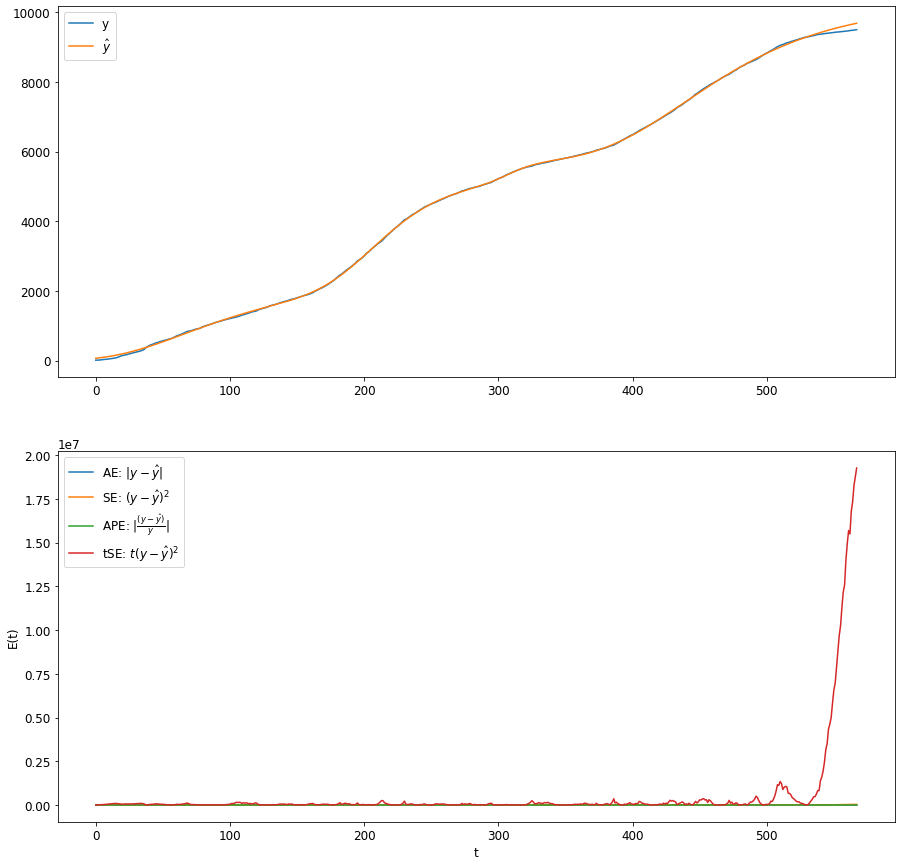

<Figure size 1080x432 with 0 Axes>

In [25]:
x = t[:x_nw[-1]]
y = scaling_factor * acc_data[:x_nw[-1]]
y_h = scaling_factor * y_m
plotErrorFns(x, y, y_h)

SAE:  2257.542883291153
SSE:  367899.05735872954
SAPE:  0.23847698735800402
MAE:  161.2530630922252
MSE:  26278.50409705211
MAPE:  0.017034070525571716
RMSE:  162.10645914661177
rel. RMSE:  0.01706743094826403
ITSE: 206503611.13224834
MTSE (?): 14750257.938017739


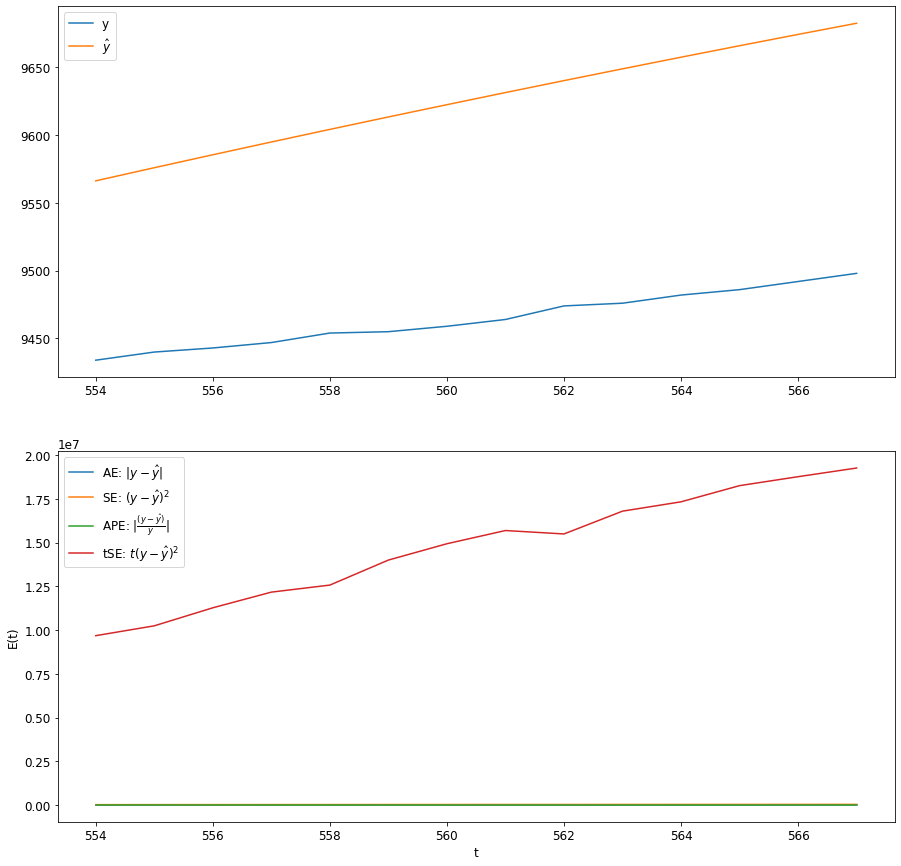

<Figure size 1080x432 with 0 Axes>

In [26]:
x = t[x_nw[-1] - 14:x_nw[-1]]
y = scaling_factor * acc_data[x_nw[-1] - 14:x_nw[-1]]
y_h = scaling_factor * y_m[x_nw[-1] - 14:]
plotErrorFns(x, y, y_h)

In [27]:
data.date[12:x_nw[-1] + 12]

12     2020-03-15
13     2020-03-16
14     2020-03-17
15     2020-03-18
16     2020-03-19
          ...    
575    2021-09-29
576    2021-09-30
577    2021-10-01
578    2021-10-02
579    2021-10-03
Name: date, Length: 568, dtype: object